---



4. **R 실습**. 어떤 슈퍼마켓에서 고객이 구입하는 상품의 금액과 카운터에서 값을 치르는 데 걸리는 시간 사이에 회귀함수관계가 있는가를 알아보기 위하여 10명의 고객을 임의로 추출하여 다음의 데이터를 얻었다.

|구매 상품의 금액 $x$<br>(단위 : 천원)|소요되는 시간 $y$<br>(단위 : 분)||구매 상품의 금액 $x$<br>(단위 : 천원)|소요되는 시간 $y$<br>(단위 : 분)|
|:-:|:-:|:-:|:-:|:-:|
|6.4|1.7||32.1|4.1|
|16.1|2.7||7.2|1.2|
|42.1|4.9||3.4|0.5|
|2.1|0.3||20.8|3.3|
|30.7|3.9||1.5|0.2|



---

(1) 데이터의 산점도를 그려라.

`-` 먼저 데이터프레임을 정의하면 아래와 같다.

In [1]:
x <- c(6.4, 16.1, 42.1, 2.1, 30.7, 32.1, 7.2, 3.4, 20.8, 1.5)
y <- c(1.7, 2.7, 4.9, 0.3, 3.9, 4.1, 1.2, 0.5, 3.3, 0.2)

df <- data.frame(x, y)
df

x,y
<dbl>,<dbl>
6.4,1.7
16.1,2.7
42.1,4.9
2.1,0.3
30.7,3.9
32.1,4.1
7.2,1.2
3.4,0.5
20.8,3.3


`-` 데이터의 산점도

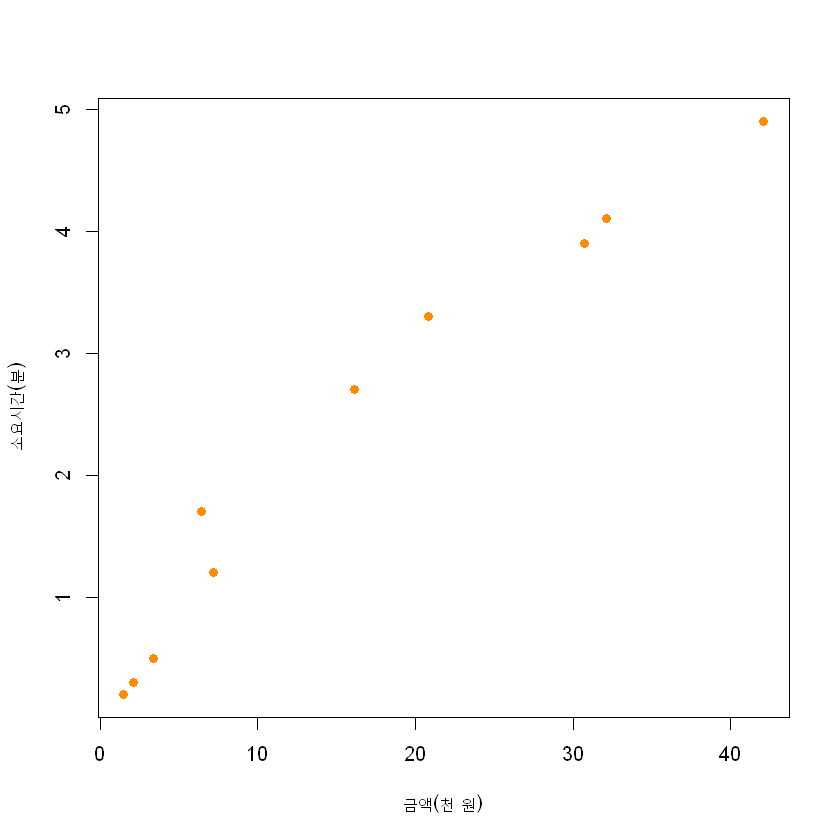

In [2]:
plot(y~x, df, pch = 16, col = 'darkorange', xlab = '금액(천 원)', ylab = '소요시간(분)')

> 데이터가 약간의 비선형성이 존재하는 것으로 보인다.

---




(2) 단순회귀모형, $y = β_0 + β_1x + ϵ$을 가정하고, 이를 적합한 경우에 결정계수 $R^2$의 값은 얼마인가? 만족할 만큼 충분히 큰가?

In [3]:
model <- lm(y~x, data = df)
print(paste('R-squared = ',summary(model)$r.squared))

[1] "R-squared =  0.954247030991951"


> 결정계수의 값을 더 높일 수 있을 것 같다.

---




(3) 다음의 비선형모형을 고려하자.

<div class="div-box">
&nbsp &nbsp &nbsp (a) $y = e^{\beta_0 + \beta_1 x + \epsilon}$
<br><br>
&nbsp &nbsp &nbsp (b) $y = \beta_0 + \beta_1 \sqrt{x} + \epsilon$
<br><br>
&nbsp &nbsp &nbsp (c) $y = \beta_0 x^{\beta_1} \epsilon$
<br><br>
&nbsp &nbsp &nbsp (d) $y = \beta_0ㆍ{\beta_1}^x \epsilon$
<br><br>
&nbsp &nbsp &nbsp (e) $y = \beta_0 + \beta_1 (\frac{1}{x}) + \epsilon$
</div>

<br>
위의 모형을 적절한 모형변환을 통하여 선형모형으로 만든 후 회귀모형을 적합하고 각각 $R^2$을 구하시오. 어떤 모형이 가장 큰 $R^2$의 값을 가지는가?

`-` 각각 변환 후 적합

In [22]:
## (a)
log_y <- log(y)
model_a <- lm(log_y~x)

## (b)
sqrt_x <- sqrt(x)
model_b <- lm(y~sqrt_x)

## (c)
log_x <- log(x)
model_c <- lm(log_y~log_x)  ## _beta0 = log(beta0), _epsilon = log(epsilon)

## (d)
model_d <- lm(log_y~x)  ## _beta0 = log(beta0), _beta1 = log(beta1), _epsilon = log(epsilon)

## (e)
inv_x <- 1/x
model_e <- lm(y~inv_x)

`-` 각각의 R-squared 산출

In [34]:
data.frame(
    'Model' = c('a', 'b', 'c', 'd', 'e'),
    'R-squared' = c(summary(model_a)$r.squared, summary(model_b)$r.squared,
                    summary(model_c)$r.squared, summary(model_d)$r.squared,
                    summary(model_e)$r.squared)
)

Model,R.squared
<chr>,<dbl>
a,0.7384658
b,0.9888110
c,0.9624502
d,0.7384658
e,0.6873067


> (b)의 경우가 가장 큰 $R^2$값을 가진다.


---




(4) 위의 (3)에서 $R^2$의 값이 가장 큰 모형이 선택되었을 경우, 이 모형의 추정식을 사용하여 구매상품의 총 금액이 $10,000$원인 경우에, 카운터에서 값을 치르는 데 평균 몇 분이 소요되리라고 예측하는가?

`-` `model_b`를 사용하여 예측하면...

In [49]:
predict(model_b, newdata = data.frame(sqrt_x = sqrt(10)))  ## x값에 10을 넣어줘야 하므로, 해당 모델에는 sqrt(10)을 넣는다.

1 
1.885693

> 따라서 카운터에서 값을 치르는 데 평균 1.89분이 필요하다고 예측된다.


---




5. **R 실습**. 아마존 강 수위 문제 (문제의 출처 : 참고문헌(3.8)) 아마존 강 유역은 지구상의 가장 큰 열대우림 지역이지만, 대부분의 다른 자연자원과 마찬가지로 개발의 손길이 미치면서 열대림이 급속히 파괴됐다. 1970년대 이후 아마존 상류 지역에 도로가 건설되면서 인구가 빠르게 증가되었고 대규모의 삼림파괴가 이뤄졌다. 강수량과 유수량이 모두 영향을 받을 수 있기 때문에 이것은 결국 아마존 강 전체에 영향을 미치는 심각한 기후학적 및 수문학적 변화를 가져왔다. 다음의 표는 페루 이키토스(Iquitos)에서 1962년부터 1978년까지 기록한 아마존 강 최고수위(High)와, 최저수위(Low)를 기록한 것이다. (단위 : 미터)

<div style="text-align: center">Table 1 : 아마존 강 데이터 (Amazom River data)</div>

|Year|High (m)|Low (m)||Year|High (m)|Low (m)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1962|25.82|18.24||1971|27.36|21.91|
|1963|25.35|16.50||1972|26.65|22.51|
|1964|24.29|20.26||1973|27.13|18.81|
|1965|24.05|20.97||1974|27.49|19.42|
|1966|24.89|19.43||1975|27.08|19.10|
|1967|25.35|19.31||1976|27.51|18.80|
|1968|25.23|20.85||1977|27.54|18.80|
|1969|25.06|19.54||1978|26.21|17.57|
|1970|27.13|20.49||

    1962년부터 1969년까지의 데이터는 개발 이전에 수집된 데이터이고, 1970년부터 1978년까지의 데이터는 개발 이후에 관측된 데이터를 나타낸다. 이 데이터는 아마존 상류지역의 삼림파괴가 아마존 유역의 강 수위에 변화를 일으켰는지 분석하고자 한다. 우리의 관심은 시간에 따른 아마존 강 수위 변화여부이다. 예를 들어 우리가 다음을 적합한다면,

$$High = \beta_0 + \beta_1 × Year + \epsilon$$

(1) $\beta_1 = 0$은 시간에 따른 아마존 강의 최고수위에 아무런 (선형)변화가 없다는 것을 의미하고, (2) $\beta_1 > 0$은 아마존 강의 최고수위가 증가된 것을 의미하는데, 이것은 해마다 아마존 강에 흐르는 물이 늘어난 것을 나타낼 수 있다. (3) $\beta_1 < 0$는 시간에 따라 아마존 강의 최고수위가 낮아 진 것을 의미하는데, 이것은 해마나 아마존 강의 흐르는 물이 줄어든 것을 의미한다.


---




(1) $High$와 $Year$, $Low$와 $Year$, 그리고 $High$와 $Low$에 대해 산점도를 그리시오.

`-` 데이터를 데이터프레임으로 입력

In [1]:
df <- data.frame(
    Year = seq(1962, 1978),
    High = c(25.82, 25.35, 24.29, 24.05, 24.89, 25.35, 25.23, 25.06, 27.13,
             27.36, 26.65, 27.13, 27.49, 27.08, 27.51, 27.54, 26.21),
    Low = c(18.24, 16.50, 20.26, 20.97, 19.43, 19.31, 20.85, 19.54, 20.49,
           21.91, 22.51, 18.81, 19.42, 19.10, 18.80, 18.80, 17.57)
)

head(df)

,Year,High,Low
,<int>,<dbl>,<dbl>
1,1962,25.82,18.24
2,1963,25.35,16.50
3,1964,24.29,20.26
4,1965,24.05,20.97
5,1966,24.89,19.43
6,1967,25.35,19.31


`-` 개별 산점도 산출

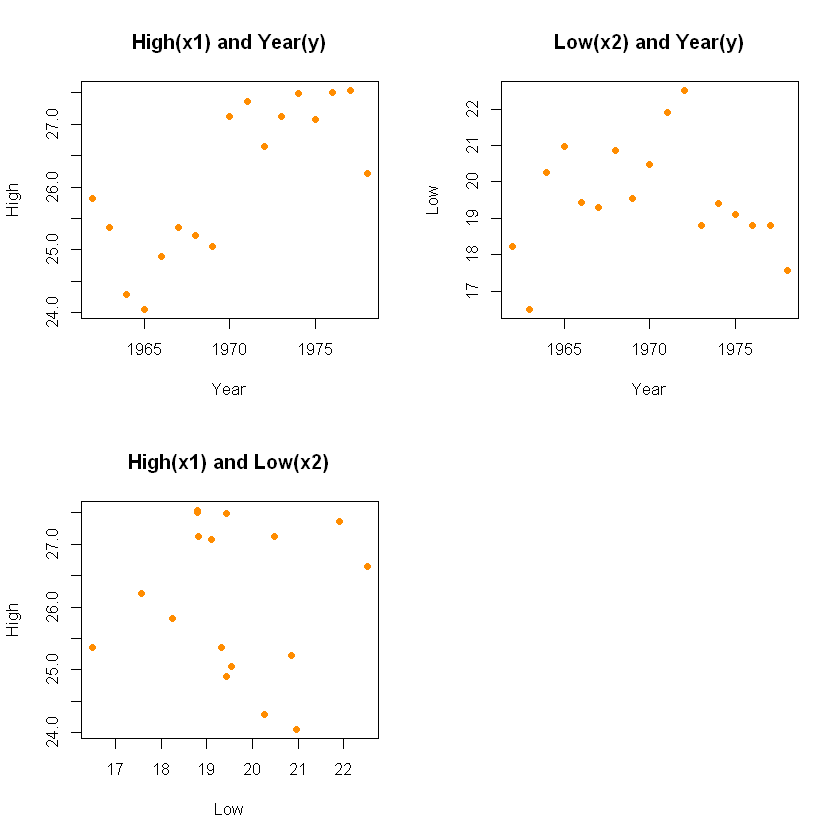

In [2]:
par(mfrow = c(2,2))
plot(High ~ Year, data = df, pch = 16, col = 'darkorange', main = bquote('High(x1) and Year(y)'))
plot(Low ~ Year, data = df, pch = 16, col = 'darkorange', main = 'Low(x2) and Year(y)')
plot(High ~ Low, data = df, pch = 16, col = 'darkorange', main = 'High(x1) and Low(x2)')

(2) $Year$에 대한 $High$, $Year$에 대한 $Low$, 그리고 $Low$에 대한 $High$의 회귀모형을 구하시오. 3개 모형의 결과를 요약하고, 각 모형별로 회귀계수의 의미를 설명하시오.

`-` `Year`에 대한 `High`

In [11]:
model_1 <- lm(High ~ Year, data = df)
summary(model_1)


Call:
lm(formula = High ~ Year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3629 -0.5341  0.1479  0.4903  1.1412 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -330.21235   78.03319  -4.232 0.000725 ***
Year           0.18088    0.03961   4.567 0.000371 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8001 on 15 degrees of freedom
Multiple R-squared:  0.5816,	Adjusted R-squared:  0.5537 
F-statistic: 20.85 on 1 and 15 DF,  p-value: 0.0003708


In [9]:
model_1$coefficients[2]

Year 
0.1808824

* 모형의 F값에 대한 `p-value`가 0.01보다 작으므로 해당 모형은 유의수준 0.01에서 통계적으로 유의하다.
* 회귀계수의 경우 `p-value`가 0.01보다 작으므로 통계적으로 유의하고, 해당 값이 양수이므로, 시간이 지남에 따라 아마존 강의 최고수위가 증가함을 의미한다.

`-` `Year`에 대한 `Low`

In [12]:
model_2 <- lm(Low ~ Year, data = df)
summary(model_2)


Call:
lm(formula = Low ~ Year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1147 -0.7121 -0.1610  0.9306  2.9664 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  35.106961 151.723912   0.231     0.82
Year         -0.007892   0.077017  -0.102     0.92

Residual standard error: 1.556 on 15 degrees of freedom
Multiple R-squared:  0.0006996,	Adjusted R-squared:  -0.06592 
F-statistic: 0.0105 on 1 and 15 DF,  p-value: 0.9197


* 모형의 F값에 대한 `p-value`가 0.9197로 해당 모형은 통계적으로 유의미하지 않다.
* 회귀계수는 시간이 지남에 따라 아마존 강의 최저수위가 얼마나 변하는지를 의미한다.

`-` `Low`에 대한 `High`

In [16]:
model_3 <- lm(High ~ Low, data = df)
summary(model_3)


Call:
lm(formula = High ~ Low, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05605 -0.87774  0.05615  1.01720  1.40344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.40088    4.02478   6.560 9.05e-06 ***
Low         -0.01406    0.20520  -0.069    0.946    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 15 degrees of freedom
Multiple R-squared:  0.0003129,	Adjusted R-squared:  -0.06633 
F-statistic: 0.004695 on 1 and 15 DF,  p-value: 0.9463


* 모형의 F값에 대한 `p-value`가 0.9463으로, 해당 모형은 통계적으로 유의미하지 않다.
* 회귀계수는 아마존 강의 최저수위가 증가함에 따라 최고수위가 얼마나 변하는지를 의미한다.

(3) 이 자료를 근거로 우리는 삼림파괴가 아마존 강 수위의 변화를 일으킨다고 할 수 있는가? 이용가능하다면 이러한 인과관계를 추론하는 데 사용될 수 있는 추가 정보는 무엇이 있겠는가?

<div class="div-box">
&nbsp 시간에 따라 아마존 강 최고수위가 올라간다는 것은 통계적으로 유의미했다. 다만, 이를 삼림파괴와 직접적으로 연결할 수는 없다. 삼림파괴의 정도가 시간에 따라 얼마나 많이 변했느냐에 따른 정보도 없으며, 삼림파괴가 아닌 이외의 요인이 아마존 강 수위의 변화를 일으켰을 수도 있다.
<br>
&nbsp 이에 따라 아마존 삼림지역의 면적을 연도에 따라 추가적으로 기재하여 이러한 인과관계를 추론하는 데 사용할 수 있을 것이다.
</div>

(4) 아마존 강의 최저수위와 최고수위와의 산점도를 1960년대, 1970년대 자료별로 다르게 그리고, 각각의 회귀선을 적합하시오.

`-` 데이터 분할

In [55]:
df_60 <- df[which(substr(df$Year, 1, 3) == 196),]
df_70 <- df[which(substr(df$Year, 1, 3) == 197),]